# Exploring Datasets with Python

To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/), _an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language_™. Let's import it!

In [1]:
import pandas as pd

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [2]:
affairs = pd.read_csv('datasets/affairs.csv')

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [3]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         601 non-null    object 
 1   age         601 non-null    float64
 2   ym          601 non-null    float64
 3   child       601 non-null    object 
 4   religious   601 non-null    int64  
 5   education   601 non-null    int64  
 6   occupation  601 non-null    int64  
 7   rate        601 non-null    int64  
 8   nbaffairs   601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [4]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


We can access a column of our dataset by using bracket notation and the name of the column.

In [5]:
affairs['age'].tail()

596    22.0
597    32.0
598    32.0
599    22.0
600    32.0
Name: age, dtype: float64

For categorical features like `sex`, you can also get the distributions of each value by using `value_counts()`.

In [6]:
affairs['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

But what about numerical values? It definitly makes no sense to count each distinct value. Therefore, we can use `describe()`.

In [7]:
affairs['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

You can also access values like `mean` or `max` directly with the corrsponding methods. Let's see who is the oldest cheater!

In [8]:
affairs['age'].min()

17.5

This works for the whole dataframe as well. Pandas knows which values are numerical based on the datatype and hides the categorical features for you.

In [9]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [10]:
affairs[affairs['sex'] == 'female'].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
8,female,32.0,15.00,yes,4,16,1,2,0


The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before. Let's see how the numerical distribution is for our females.

In [17]:
affairs[affairs['age'] == 17.5].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
80,male,17.5,1.50,yes,3,18,6,5,0
305,female,17.5,0.75,no,2,18,5,4,0
419,female,17.5,10.00,no,4,14,4,5,0
482,female,17.5,0.75,no,5,14,4,5,1
540,female,17.5,0.75,yes,2,12,1,3,12


We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

In [19]:
affairs['below_30'] = affairs['age'] < 30

In [20]:
affairs['below_30'].value_counts()

False    325
True     276
Name: below_30, dtype: int64

In [21]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,3,18,7,4,0,False
1,female,27.0,4.00,no,4,14,6,4,0,True
2,female,32.0,15.00,yes,1,12,1,4,0,False
3,male,57.0,15.00,yes,5,18,6,5,0,False
4,male,22.0,0.75,no,2,17,6,3,0,True


We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [22]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

In [23]:
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [24]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


This should be enought about Pandas. Let's get some visualisations!

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [25]:
import seaborn as sns

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


To see our charts directly in our notebook, we have to execute the following:

In [26]:
%matplotlib inline
sns.set()
sns.set_context('talk')

Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `distplot` by passing our series of ages as argument.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


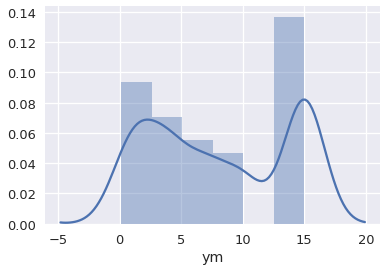

In [31]:
sns.distplot(affairs['ym'])

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase to number of buckets for our histogram by setting `bins` to a higher number.

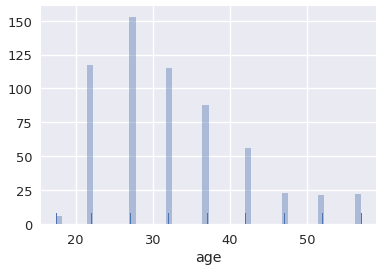

In [28]:
sns.distplot(affairs['age'], bins=50, rug=True, kde=False)

Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

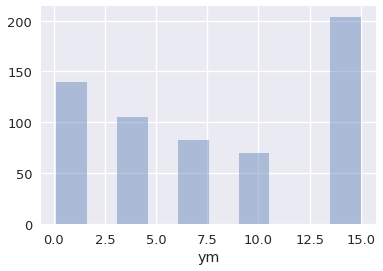

In [32]:
sns.distplot(affairs['ym'], bins=10, kde=False)

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


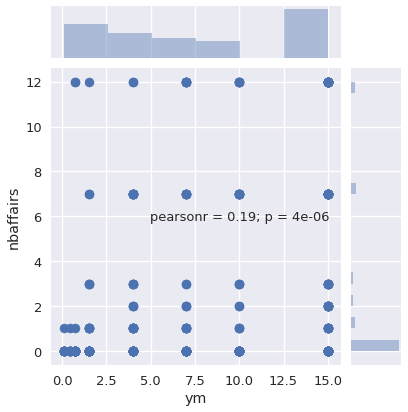

In [33]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'])

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


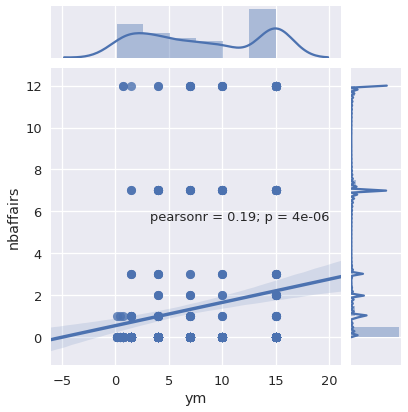

In [34]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'], kind='reg')

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


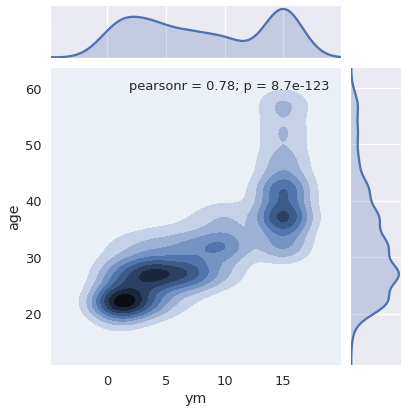

In [35]:
sns.jointplot(affairs['ym'], affairs['age'], kind='kde', shade=True)

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

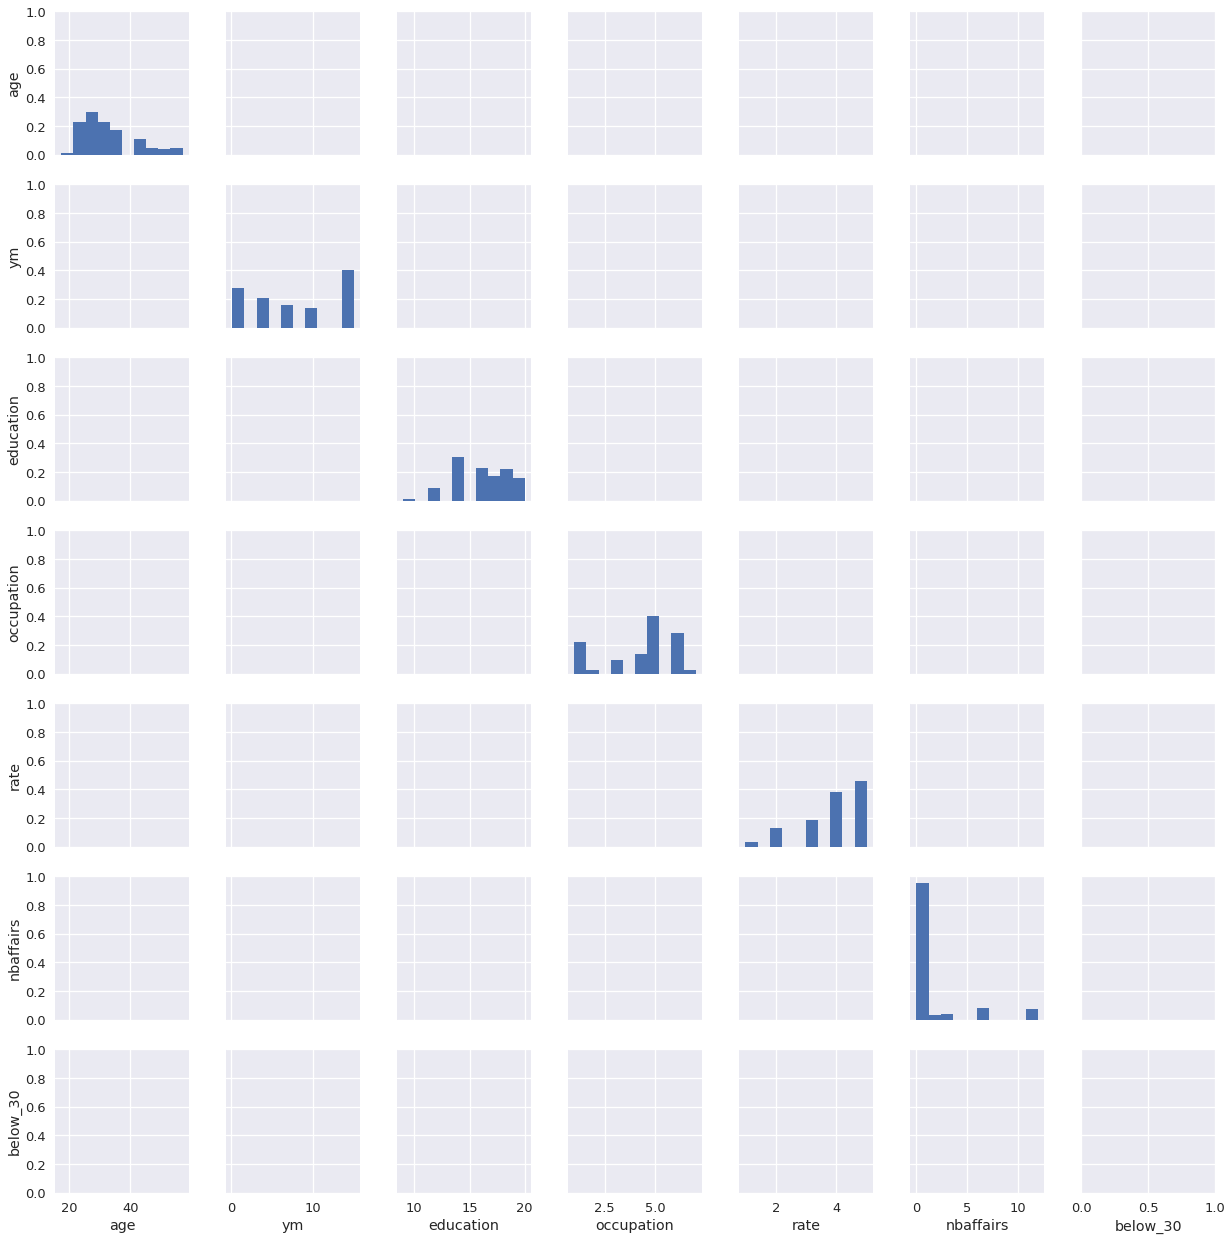

In [39]:
sns.pairplot(affairs)

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `sex` first. To make things even more interesting, let's create a regression for every plot, too!

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


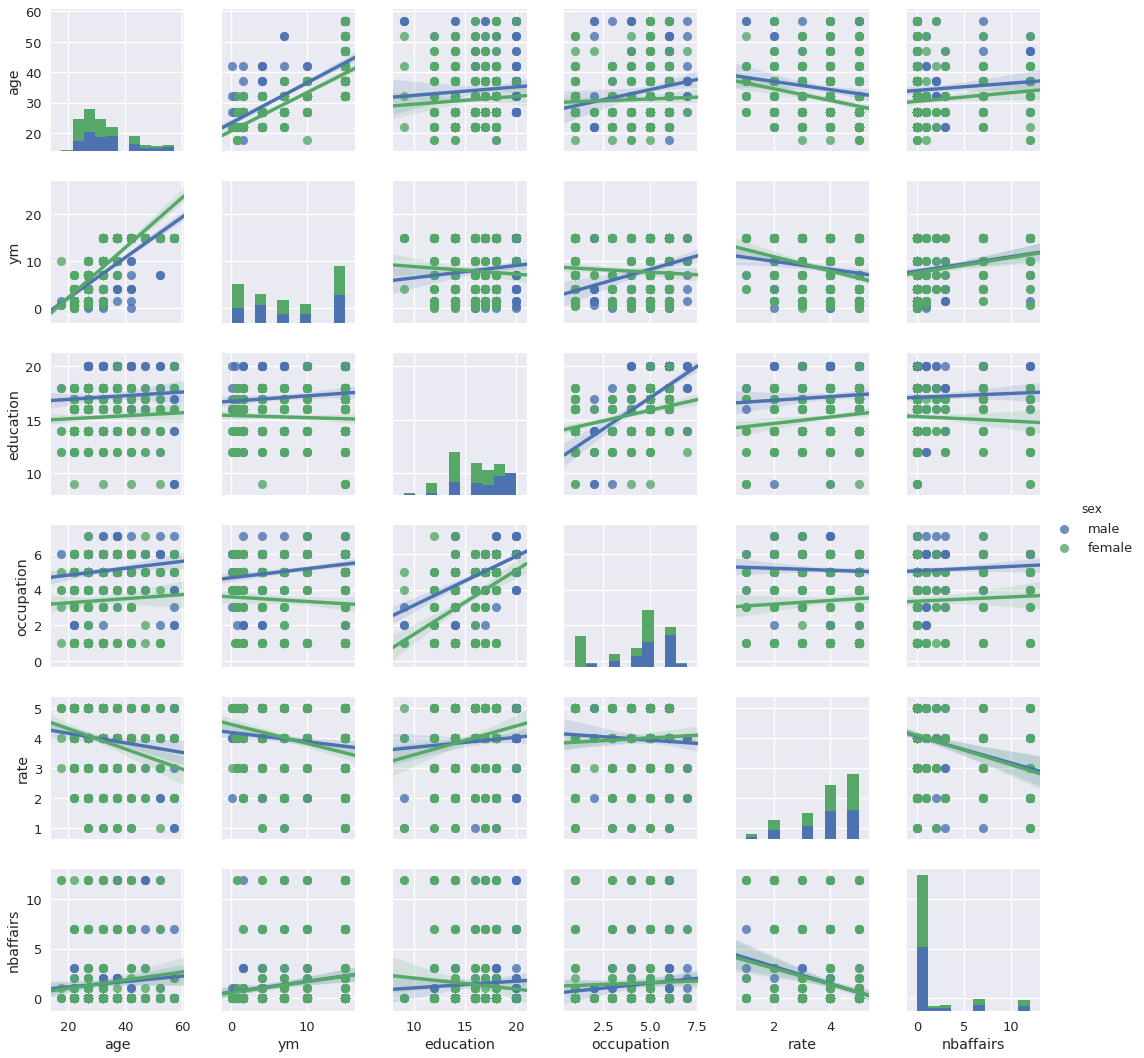

In [38]:
sns.pairplot(affairs.drop('below_30', axis=1), hue='sex', kind='reg')

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


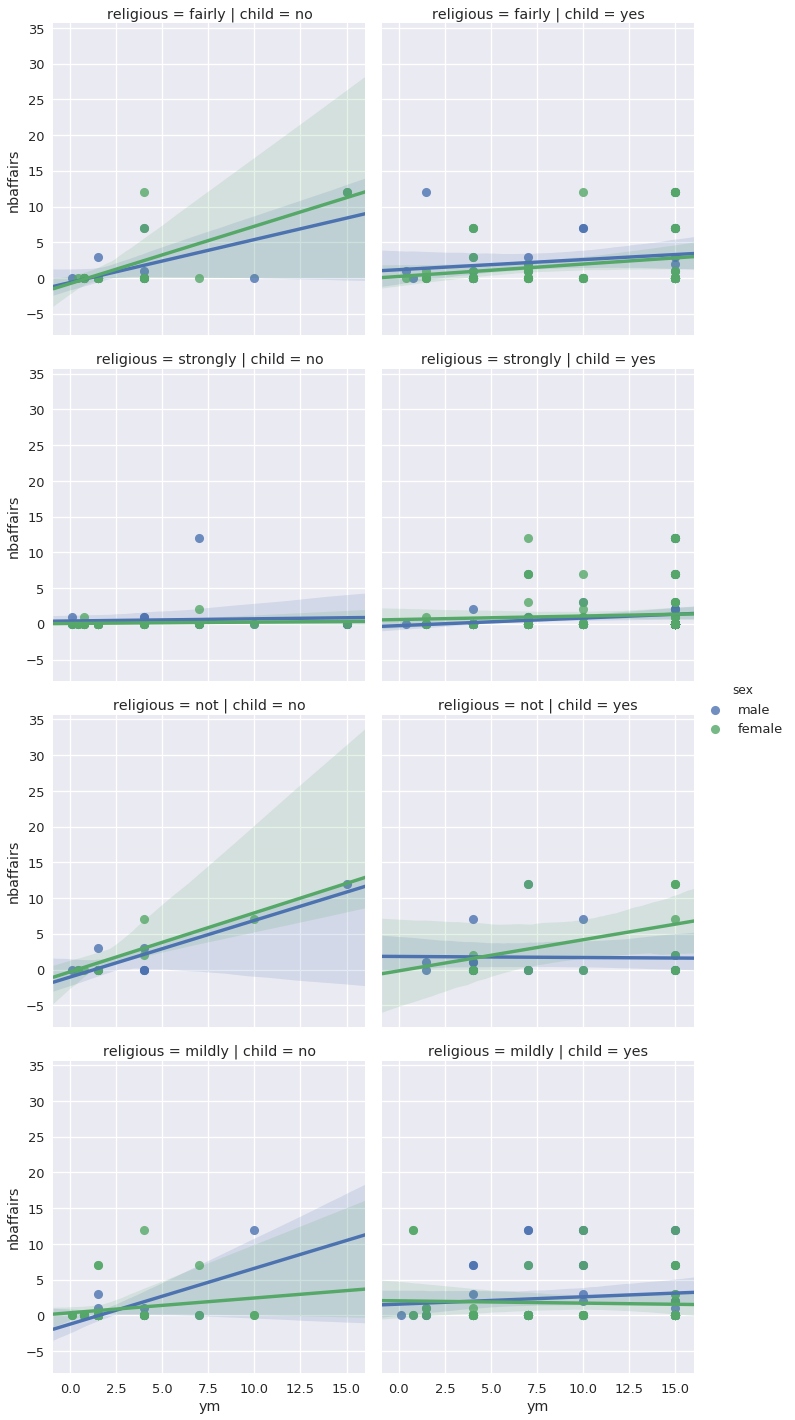

In [40]:
sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)

Here are some categorical plots to explore the dataset even further.

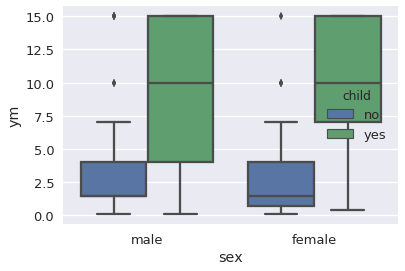

In [41]:
sns.boxplot(x="sex", y="ym", hue="child", data=affairs);

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


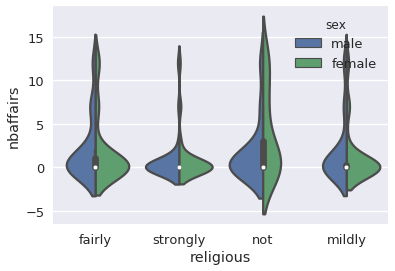

In [42]:
sns.violinplot(x="religious", y="nbaffairs", hue="sex", data=affairs, split=True);

We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [43]:
affairs.corr()

,age,ym,education,occupation,rate,nbaffairs,below_30
age,1.000000,0.777546,0.134596,0.166413,-0.199000,0.095237,-0.775833
ym,0.777546,1.000000,0.040003,0.044592,-0.243119,0.186842,-0.763049
education,0.134596,0.040003,1.000000,0.533605,0.109303,-0.002437,-0.144546
occupation,0.166413,0.044592,0.533605,1.000000,0.017422,0.049612,-0.146437
rate,-0.199000,-0.243119,0.109303,0.017422,1.000000,-0.279512,0.181229
nbaffairs,0.095237,0.186842,-0.002437,0.049612,-0.279512,1.000000,-0.149754
below_30,-0.775833,-0.763049,-0.144546,-0.146437,0.181229,-0.149754,1.000000


Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

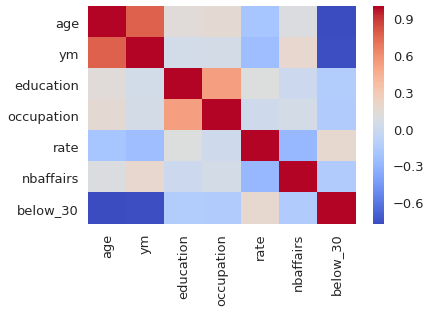

In [44]:
sns.heatmap(affairs.corr(), cmap='coolwarm')